In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import savefig
%matplotlib inline
from math import *
import random
import os

import seaborn as sns
sns.set(style='ticks')
sns.color_palette("husl", 2)

#Donut stuff
from donut import *
random.seed()
randSeed = random.randint(0,1000000)

w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_20000_combined_check.dat")
w.SetSeed(randSeed)

In [1]:
#k = bearclaw.MakeStandardKeyboard(alphabetStr="abcdefghijklmnopqrstuvwxyz.")
#k.RemoveKey('.')
#bearclaw.DrawKeyboard(k,wordlist=w,colormap=mpl.cm.Blues,nopalette=True,figsize=(8,6),axis='off',saveas="/Users/Rylan/Desktop/keyboardOpt_blue.svg")
#bearclaw.DrawKeyboard(k,wordlist=w,colormap=mpl.cm.Reds,nopalette=True,figsize=(8,6),axis='off',saveas="/Users/Rylan/Desktop/keyboardOpt_red.svg")

In [2]:
nFiles=4
datList = []

for j in range(0,nFiles):
    filename = "/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/finalOpt2_6.000"+str(j)+".dat"
    if os.path.exists(filename):
        print(filename)
        dat = cruller.TrainingDataFileFormat()
        dat.LoadFromFile(filename)
        datList.append(dat)
print(len(datList))

/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/finalOpt2_6.0000.dat
/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/finalOpt2_6.0001.dat
/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/finalOpt2_6.0002.dat
/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/finalOpt2_6.0003.dat
4


In [3]:
allFin, avFin, spFin, hermFin, monFin, cubFin, modFin, monFinErr, avFinErr = [],[],[],[],[],[],[],[],[]
nFiles,i = 0,0
keyboards2 = []

for dat in datList:
    meta, eff = dat.PythonData()
    nFiles += 1
    for keyboard, d in eff:
        keyboards2.append(keyboard)
        allFin.append(1-d['spatial'].Fitness())        
        allFin.append(1-d['cubic'].Fitness())        
        allFin.append(1-d['modCubic'].Fitness())        
        allFin.append(1-d['hermite'].Fitness())        
        allFin.append(1-d['monotonic'].Fitness())
        monFinErr.append(d['monotonic'].Error())
        avFin.append(sum(allFin[-5:])/5)
        avFinErr.append((5*monFinErr[-1])/sqrt(5)) 
        
blankErr = [0 for x in avFinErr]
print(len(keyboards2))

200


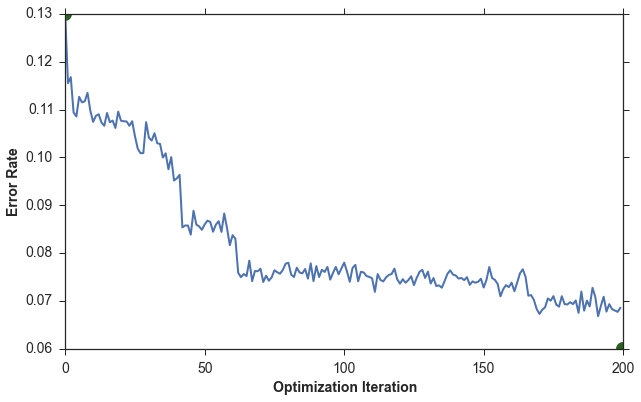

In [4]:
nSwaps = [10,20,20,30,50,70]
iSwaps = [10,30,50,80,130,200]

point1 = (0.13)
point2 = (0.06)

plt.figure(figsize=(10,6))
c1 = "#276419"
#plt.errorbar(range(len(keyboards)),avFin,yerr=avFinErr,fmt='-o')
ymin,ymax = 0.06,0.13
xmin,xmax = 0,200
#[plt.plot([l,l],[ymin,ymax], linestyle='--', linewidth=1.3,alpha=0.7,color='black') for l in iSwaps[:-1]]
plt.plot(range(len(keyboards2)),avFin,lw=2,ls="-")
plt.scatter(0,point1,marker='o',s=180,c=c1)
plt.scatter(200,point2,marker='o',s=180,c=c1)
plt.ylabel('Error Rate',fontsize=14,fontweight='bold')
#plt.ylim(0.20,0.24)
plt.xlabel('Optimization Iteration',fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().tick_params(labeltop='off',labelright='off')
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
savefig('/Users/Rylan/Desktop/bestKeybd_optimization.svg',pad_inches=0,bbox_inches='tight')
plt.show()

In [5]:
#Load the keyboard strings and parse through all the data for the json file
file= open("/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/bestKeyboardProgressionExtra.txt","r")
file2= open("/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/bestKeyboardProgressionNAttempts.txt","r")
nAttempts = [int(line2) for line2 in file2]
print(len(nAttempts))

data = []

i = 0
data.append((0,i,'qzwkhcxlngmyfeoiraudvpstbj',6,True,avFin[i],avFinErr[i]))
data.append((1,i,'fnwkhcxgslmjqavirezdoputby',6,True,avFin[i],avFinErr[i]))
j = 2
for line in file:        
    if str(line.split()[1]) == 'before':
        i+=1
        if nAttempts[i] != 3:
            improved = True
        else:
            improved = False
        if i < 10:
            nSwp=6
        elif i < 30:
            nSwp=5
        elif i < 50:
            nSwp=4
        elif i < 80:
            nSwp=3
        elif i < 130:
            nSwp=2
        else:
            nSwp=1
        data.append((j,i,str(line[22:-1]),nSwp,improved,avFin[i],avFinErr[i]))
    else:
        if nAttempts[i] != 3:
            improved = True
        else:
            improved = False
        data.append((j,i,str(line[22:-1]),nSwp,improved,avFin[i],avFinErr[i]))
    j+=1

nKeyboards = len(data)
print("nKeyboards = ", nKeyboards)

200
nKeyboards =  584


In [6]:
[print(d) for d in data]
print("hi")

(0, 0, 'qzwkhcxlngmyfeoiraudvpstbj', 6, True, 0.12989000000000592, 0.0074930619575715104)
(1, 0, 'fnwkhcxgslmjqavirezdoputby', 6, True, 0.12989000000000592, 0.0074930619575715104)
(2, 1, 'fnwkhcxgslmjqavirezdoputby', 6, True, 0.11554400000000561, 0.006805814425915608)
(3, 1, 'dnumhcxgsikeqavrljzfopwtby', 6, True, 0.11554400000000561, 0.006805814425915608)
(4, 2, 'dnumhcxgsikeqavrljzfopwtby', 6, False, 0.11680000000000565, 0.006800066911435739)
(5, 2, 'dnumprsxgikbqavclhzfojwtey', 6, False, 0.11680000000000565, 0.006800066911435739)
(6, 2, 'dkxmprsngiubqahcwvtfojlzey', 6, False, 0.11680000000000565, 0.006800066911435739)
(7, 3, 'dnumhcxgsikeqavrljzfopwtby', 6, True, 0.10942400000000715, 0.006747984558371016)
(8, 3, 'dpumbghcrikjqavslezfonwtxy', 6, True, 0.10942400000000715, 0.006747984558371016)
(9, 4, 'dpumbghcrikjqavslezfonwtxy', 6, False, 0.1085740000000072, 0.006749680222055612)
(10, 4, 'dpvmbghyrlkjqazstwufoneixc', 6, False, 0.1085740000000072, 0.006749680222055612)
(11, 4, 'dpgmwn

In [29]:
import json
outfile= open("/Users/Rylan/cisc/creamTeam/donutData/finalOptData/gaussOutput/scratch.json","w")

test = data[0]
json.dump([{'image iter':d[0], 'opt iter':d[1], 'key string':d[2], 'nSwaps':d[3], 'improved':d[4], 'err rate':d[5], 'err rate error':d[6]} for d in data], outfile, indent=4)
outfile.close()

In [42]:
#for making gifs

#for i in range(nKeyboards):
#    filename = "/Users/Rylan/cisc/creamTeam/DonutDocs/plots/kbdProg/onlyImpKeyboard_"+str(i+5)+".svg"
#    bearclaw.DrawKeyboard(keyboards[i],wordlist=w,colormap=mpl.cm.Reds,figsize=(8,5),nopalette=True,
#                          saveas=filename,axis='off')